   Global Equities  DM Equities
0           0.0055     0.005525
Assetit Global Equities DM Equities
Results
Optimal dual variable values:  [-0.99693946  0.99936968  0.99938894 -0.00642167]
Jacobian matrix at optimum [-6.19967746e-06 -3.44692601e-06 -4.76494768e-06  1.69211399e-06]

-- MEAN VALUES (pre/post) --
Global Equities    6.803574
DM Equities        6.835148
EM Equities        9.950194
dtype: float64
Global Equities    6.697891
DM Equities        6.731559
EM Equities        9.818857
dtype: float64

-- VOLATILITY (pre/post) --
Global Equities    14.174525
DM Equities        14.120190
EM Equities        18.865395
dtype: float64
Global Equities    14.174525
DM Equities        14.120190
EM Equities        18.865395
dtype: float64

-- CORRELATION (pre/post) --
0.9998566751286977
0.8259647914622372


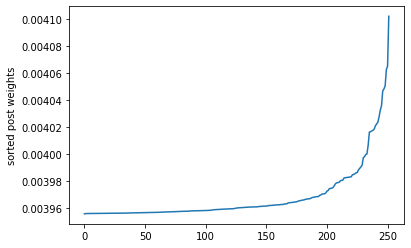

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep
data = ep.views.load()
(A,b,C,d) = data
#print(A,b)
scenarios = pd.read_excel("data.xlsx")
sample = scenarios[['Global Equities','DM Equities','EM Equities']]

def weighted_mean(x, w):
    """Weighted Mean"""
    #print((x).size)
    #print((w).size)
    return np.sum(np.array(x) * np.array(w)) / np.sum(w)

def weighted_std(values, weights):
    average = np.average(values, axis=0, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, axis=0, weights=weights)
    res = np.sqrt(variance)
    return pd.DataFrame([res], columns=values.columns).mean() # mean just to format the rows to one

def weighted_cov(x, y, w):
    return np.sum(w * np.array(x - weighted_mean(x, w)) * np.array(y - weighted_mean(y, w))) / np.sum(w)

def weighted_corr(x, y, w):
    return weighted_cov(x, y, w) / np.sqrt(weighted_cov(x, x, w) * weighted_cov(y, y, w))

def print_means(scenarios, weights):
    means = sample.multiply(weights,axis=0).sum()
    print(((1+means/100)**12-1)*100) # out in precentages 0.06 => 6 %

def print_vols(scenarios, weights):
    print(weighted_std(sample, post) * np.sqrt(12)) # out in precentages 0.06 => 6 %

m,n = scenarios.shape
pre = np.ones((1,m)).T/m
post = ep.entropy_minimizer.full_confidence_posterior(pre, A, b, C, d)
# Annualized
print('\n-- MEAN VALUES (pre/post) --')
print_means(sample, pre)
print_means(sample, post)
print('\n-- VOLATILITY (pre/post) --')
print_vols(sample, pre)
print_vols(sample, post)
print('\n-- CORRELATION (pre/post) --')
print(weighted_corr(sample['Global Equities'], sample['EM Equities'], pre))
print(weighted_corr(sample['Global Equities'], sample['EM Equities'], post))
plt.plot(np.sort(post))
plt.ylabel('sorted post weights')
plt.show()